<a href="https://colab.research.google.com/github/serayustun/Linear-Regression-Health-Costs-Calculator/blob/main/Copy_of_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Normalization

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-03-20 20:06:53--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.03s   

2025-03-20 20:06:53 (1.91 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
cat_col = dataset.describe(include="O").columns
cat_col.tolist()
for col in cat_col:
    dataset[col] = dataset[col].astype("category").cat.codes

labels = dataset.pop("expenses")

train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    dataset, labels, test_size=0.2, random_state=42
)

normalizer = Normalization()
normalizer.adapt(np.array(train_dataset))


model = keras.Sequential([
    normalizer,
    layers.Dense(128, activation="relu", input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

model.compile(optimizer="adam", loss="mse", metrics=["mae", "mse"])


model.fit(train_dataset, train_labels, epochs=300, validation_split=0.2)


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 324787584.0000 - mae: 13532.4014 - mse: 324787584.0000 - val_loss: 310309280.0000 - val_mae: 12653.4326 - val_mse: 310309280.0000
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 336963808.0000 - mae: 13751.4512 - mse: 336963808.0000 - val_loss: 309991168.0000 - val_mae: 12642.4883 - val_mse: 309991168.0000
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 344326400.0000 - mae: 13777.6660 - mse: 344326400.0000 - val_loss: 308674400.0000 - val_mae: 12599.6543 - val_mse: 308674400.0000
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 328336480.0000 - mae: 13546.3799 - mse: 328336480.0000 - val_loss: 304690048.0000 - val_mae: 12476.5938 - val_mse: 304690048.0000
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 285438304.0000 - mae: 12696.5518 - mse: 285438304.0000 - val_loss: 295380352.0000 - val_mae: 12195.8438 - val_mse: 295380352.0000
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29536

9/9 - 0s - 39ms/step - loss: 19058990.0000 - mae: 2462.0261 - mse: 19058990.0000
Testing set Mean Abs Error: 2462.03 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


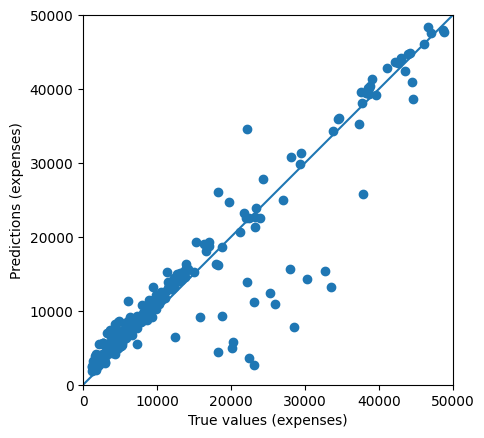

In [4]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
